# HW 09
## Keras

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.


Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:


    кількість шарів;
    кількість нейронів;
    функції активації;
    кількість епох;
    розмір батчу;
    вибір оптимізатора;
    різні техніки регуляризації і т.д.


Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras import optimizers, losses
from sklearn.metrics import classification_report

In [ ]:
# Завантажимо датасет fasion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Кожному зображенню відповідає одна мітка.
Назви класів не включено до набору даних, тому збережемо їх та використаємо пізніше при побудові зображень.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

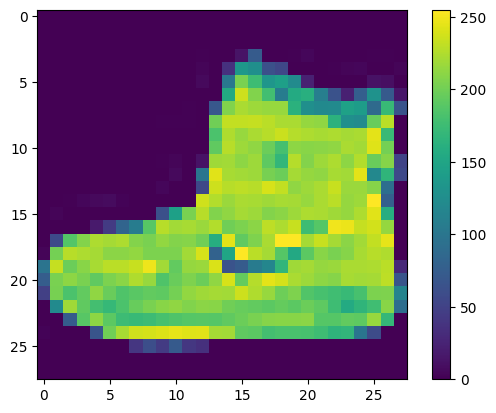

In [ ]:
# Перший елемент датасету
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Нормалізуємо дані
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

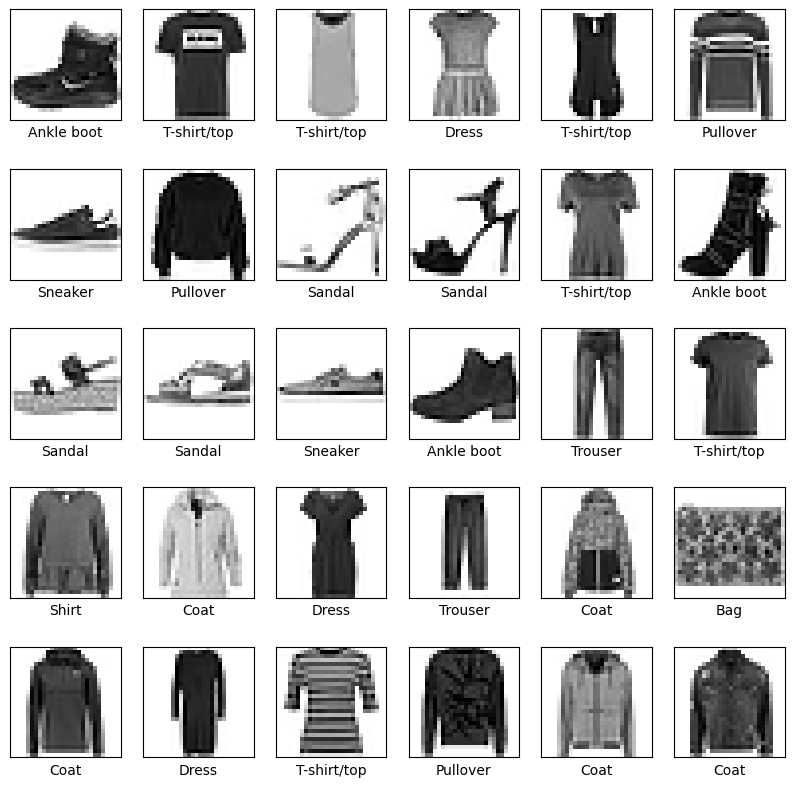

In [ ]:
# Подивимось на перші 30 зображень з тренувальної вибірки, щоб впевнитись що дані в правильному форматі
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
# Побудова простої моделі
# Поступово будемо додавати шари та експериментувати з гіперпараметрами.
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='sigmoid'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

In [ ]:
# Компілимо модель
model.compile(optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6197 - accuracy: 0.7846 - val_loss: 0.4350 - val_accuracy: 0.8426
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4093 - accuracy: 0.8542 - val_loss: 0.3920 - val_accuracy: 0.8600
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3637 - accuracy: 0.8687 - val_loss: 0.3719 - val_accuracy: 0.8640
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8787 - val_loss: 0.3383 - val_accuracy: 0.8758
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3171 - accuracy: 0.8837 - val_loss: 0.3265 - val_accuracy: 0.8806
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2977 - accuracy: 0.8900 - val_loss: 0.3159 - val_accuracy: 0.8836
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2838 - accuracy: 0.8956 - val_loss: 0.3168 - val_accuracy: 0.8849
Epoch 

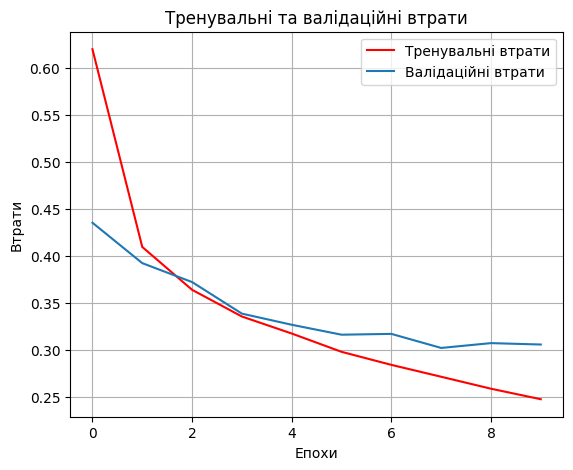

In [ ]:
# Візуалізація отриманих даних
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

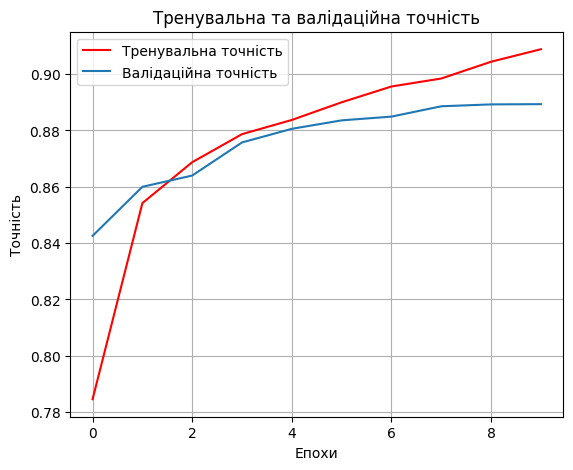

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

Наша модель має достатньо адеватні оцінки точності та втрат.

Тепер подивимось на метрики якості по кожному класу.

In [ ]:
y_pred_classes = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.81      0.80      1000
           3       0.91      0.85      0.88      1000
           4       0.82      0.79      0.80      1000
           5       0.98      0.95      0.96      1000
           6       0.68      0.70      0.69      1000
           7       0.93      0.96      0.94      1000
           8       0.98      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
# Прогноз
# Визначаємо функції для побудови графіка повного набору з 10 передбачень класів
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
# Робимо прогнозування
predictions = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


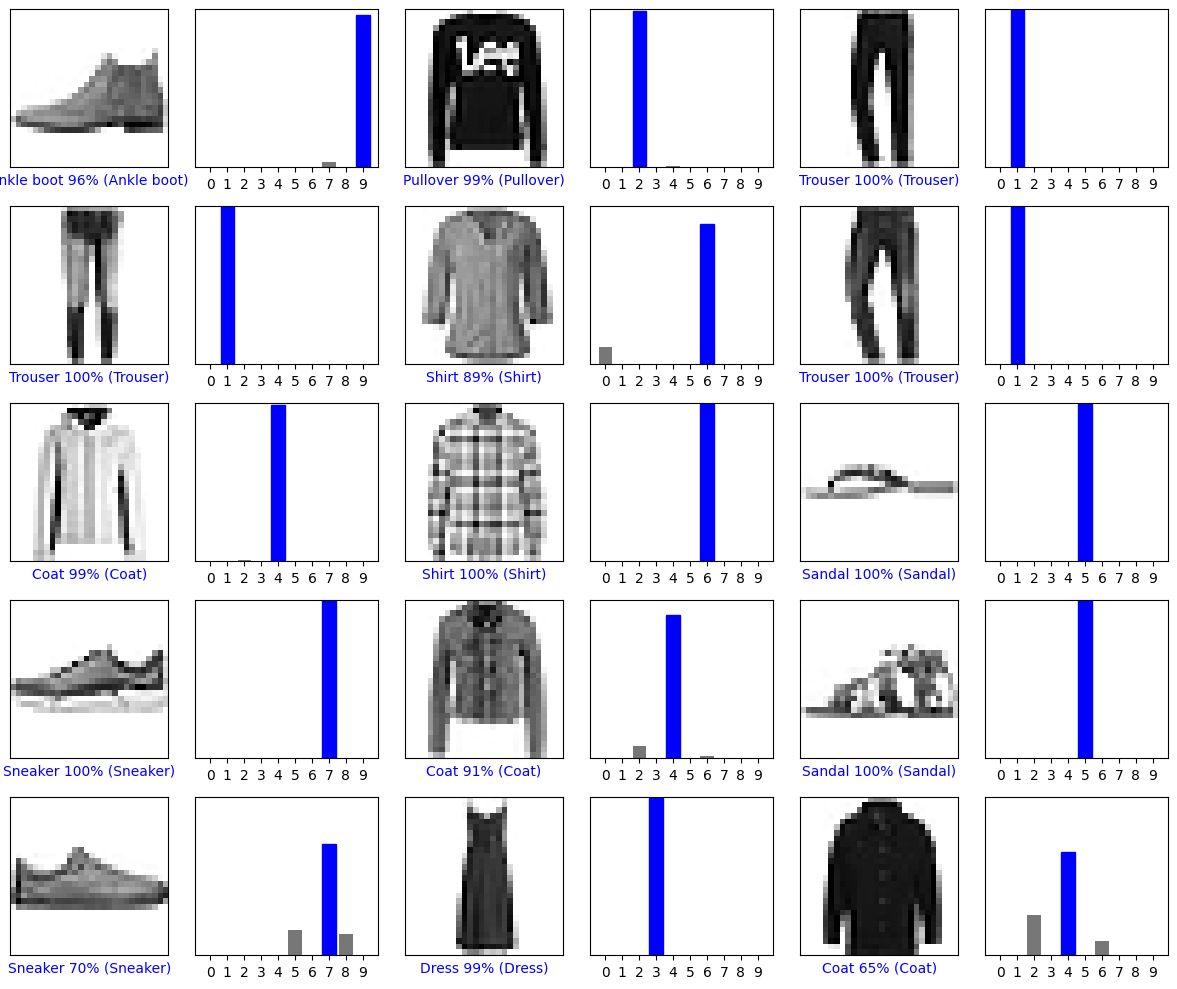

In [ ]:
# Будуємо кілька зображень з їхніми прогнозами
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

Таким чином, створена нейрона мережа з трьома шарами та активаційними функціями relu, sigmoid, softmax. Також додано Dropout(0.1) для того, щоб наша модель не перенавчалась (були спроби робити дропаутний шар 0,2 та 0,4, але 0,1 показав найкраший результат).
Використаний був оптимізатор Adam та функцію втрат sparse_categorical_crossentropy.
Модель навчена на 10 епохах.
Отримані результати візуалізовано та здійснено прогнозування.
Отримано результати 90,88% точність тренована і 88,93% точність валідована.

Як бачимо, наша модель доволі непогано навчилась і може адекватно класифікувати типи одягу. В нашому випадку ми отримали результат правильних прогнозувань 15 з 15, хоча на 13 картинці мережа нам сказала, що це sneaker, але тільки з 70% ймовірністю та на 15 картинці вірогідність становила 65%. Бачимо, що модель може вагатись з результатом, що є нормальним при даній точності валідаціних даних.